# Matplotlib & Seaborn - Lineplots

---

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as plt_patches
import matplotlib.patheffects as plt_eff
import seaborn as sns

---

## Datasets

In [2]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

---

# Basic Lineplot

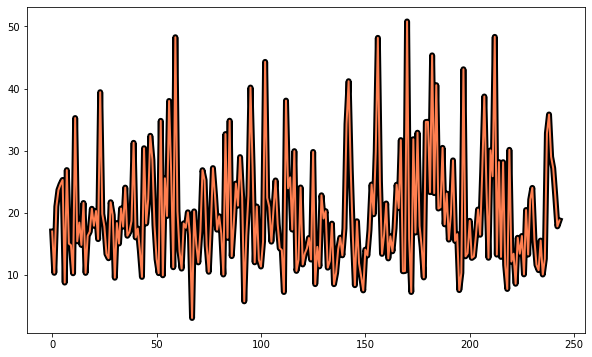

In [3]:
fig, ax = plt.subplots(figsize = (10, 6))

line_edge = [plt_eff.Stroke(linewidth = 6, foreground= "k"), plt_eff.Normal()]

plt.plot(tips.total_bill,
         color = "coral",
         alpha = 1,
         linestyle = "-",
         linewidth = 2,
         path_effects = line_edge)

plt.show()

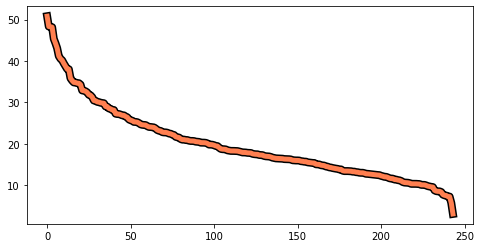

In [4]:
fig, ax = plt.subplots(figsize = (8, 4))

line_edge = [plt_eff.Stroke(linewidth = 8, foreground= "k"), plt_eff.Normal()]

# Un'idea potrebbe essere ordinare il df
# e plottare la numerica decrescente

plt.plot(tips.sort_values("total_bill", ascending=False)\
         .reset_index().total_bill,
         color = "coral", linestyle = "-", linewidth = 5,
         path_effects = line_edge)

plt.show()

---

# Two Variables Lineplot

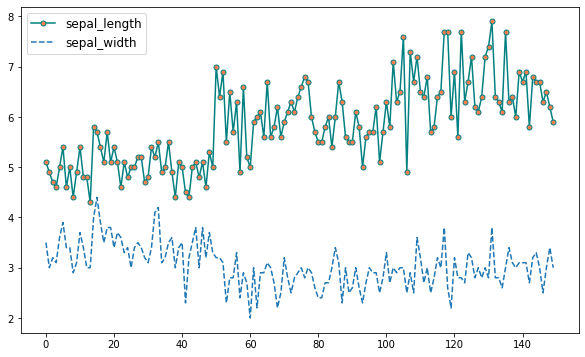

In [5]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.plot("sepal_length", data = iris, color = "teal",
         marker = "o", markerfacecolor = "coral", markersize = 5)

plt.plot("sepal_width", data = iris, linestyle = "--")

plt.legend(fontsize = 12)
plt.show()

---

# Multiple Lineplot with single highlight

In [6]:
df = pd.DataFrame({"x": range(1,11),
                   "y1": np.random.randn(10),
                   "y2": np.random.randn(10) + range(1,11),
                   "y3": np.random.randn(10) + range(11,21),
                   "y4": np.random.randn(10) + range(6,16),
                   "y5": np.random.randn(10) + range(4,14) + (0,0,0,0,0,0,0,-3,-8,-6),
                   "y6": np.random.randn(10) + range(2,12),
                   "y7": np.random.randn(10) + range(5,15),
                   "y8": np.random.randn(10)+range(4,14)})

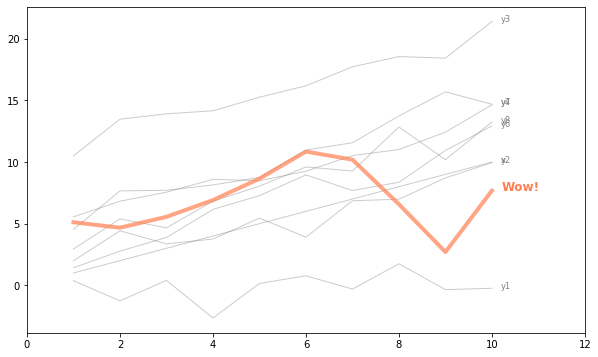

In [7]:
fig, ax = plt.subplots(figsize = (10, 6))

target_column = "y5"

for col in df.columns:
    if col != target_column:
        plt.plot(df["x"], df[col],
                 color = "grey", linewidth = 1, alpha = 0.4)
        plt.text(np.max(df.x) + 0.2, df[col].iloc[-1], col,
                 horizontalalignment = "left", size = "small",
                 color = "grey")
    
plt.plot(df["x"], df[target_column],
         color = "coral", linewidth = 4, alpha = 0.7)
plt.text(np.max(df.x) + 0.2, df[target_column].iloc[-1], "Wow!",
         horizontalalignment = "left", fontsize = 12,
         fontweight = "bold", color = "coral")


plt.xlim(0, 12)
plt.show()

---

# Lineplot Grid

In [8]:
df = pd.DataFrame({"x": range(1,11),
                   "y1": np.random.randn(10),
                   "y2": np.random.randn(10) + range(1,11),
                   "y3": np.random.randn(10) + range(11,21),
                   "y4": np.random.randn(10) + range(6,16),
                   "y5": np.random.randn(10) + range(4,14) + (0,0,0,0,0,0,0,-3,-8,-6),
                   "y6": np.random.randn(10) + range(2,12),
                   "y7": np.random.randn(10) + range(5,15),
                   "y8": np.random.randn(10) + range(4,14),
                   "y9": np.random.randn(10) + range(4,14)})

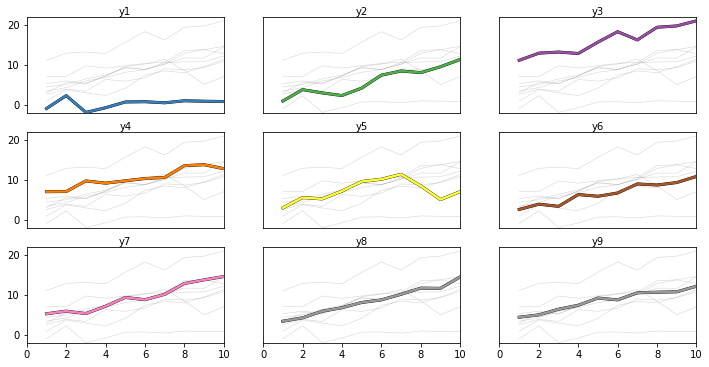

In [9]:
fig, ax = plt.subplots(figsize = (12, 6))

palette = plt.get_cmap("Set1")
line_edge = [plt_eff.Stroke(linewidth = 3, foreground= "k"), plt_eff.Normal()]

num = 0
for col in df.drop("x", axis = 1):
    num += 1
    plt.subplot(3, 3, num)
    
    for other_col in df.drop("x", axis = 1):
        plt.plot(df.x, df[other_col], color = "grey", linewidth = 0.6, alpha = 0.3)
    
    plt.plot(df.x, df[col], color = palette(num),
             linewidth = 2.5, label = col, path_effects = line_edge)
    plt.title(col, pad = 0, fontsize = 10)
    plt.xlim(0, 10)
    plt.ylim(-2, 22)
    
    if num <= 6:
        plt.xticks([])
    if num not in [1, 4, 7]:
        plt.yticks([])
        
plt.show()
    

---